In [ ]:
! pip install python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 37.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from functools import lru_cache
from Levenshtein import distance as levenshtein_distance
from collections import defaultdict
import numpy as np

# Прочтение таблиц

In [ ]:
data = pd.read_csv("/content/Starry_Sky.tsv")
data.head()

,Rank\tRead.count\tRead.proportion\tCDR3.nucleotide.sequence\tCDR3.amino.acid.sequence\tbestVGene\tbestJGene
0,0\t3492\t0.00310882489623896\tTGCGCCAGCAGCCCCC...
1,1\t3461\t0.00308122650798484\tTGTGCCAGCAGTTCCC...
2,2\t2654\t0.00236277814278872\tTGCGCCAGCAGCTACG...
3,3\t2249\t0.0020022185543074\tTGCAGTGCTTCTCTTGC...
4,4\t1999\t0.0017796509070967\tTGTGCCAGCAGTTACGG...


In [ ]:
df = pd.DataFrame(data)
df.columns = ['data']
df['CDR3.amino.acid.sequence'] = df['data'].str.split('\t').str[4]
df['Read.proportion'] = df['data'].str.split('\t').str[2]
df['Read.proportion'] = pd.to_numeric(df['Read.proportion'])
df['Read.count'] = df['data'].str.split('\t').str[1]
df['bestVGene'] = df['data'].str.split('\t').str[5]
df['bestJGene'] = df['data'].str.split('\t').str[6]
del df['data']
df

,CDR3.amino.acid.sequence,Read.proportion,Read.count,bestVGene,bestJGene
0,CASSPQFTGSYEQYF,3.108825e-03,3492,TRBV4-3,TRBJ2-7
1,CASSSPIAGQSSYEQYF,3.081227e-03,3461,TRBV28,TRBJ2-7
2,CASSYGQNYNEQFF,2.362778e-03,2654,TRBV5-1,TRBJ2-1
3,CSASLASGTGELFF,2.002219e-03,2249,TRBV20-1,TRBJ2-2
4,CASSYGQGNQPQHF,1.779651e-03,1999,TRBV6-5,TRBJ1-5
...,...,...,...,...,...
730548,FSSRTRGGKAGEQFF,8.902706e-07,1,TRBV28,TRBJ2-2
730549,FCSKSPGQKNNEAFF,8.902706e-07,1,TRBV28,TRBJ1-1
730550,FCQQLGTT_GESPLHF,8.902706e-07,1,TRBV5-6,TRBJ1-6
730551,FCQQLLPQ_GNEKLFF,8.902706e-07,1,TRBV6-2,TRBJ1-4


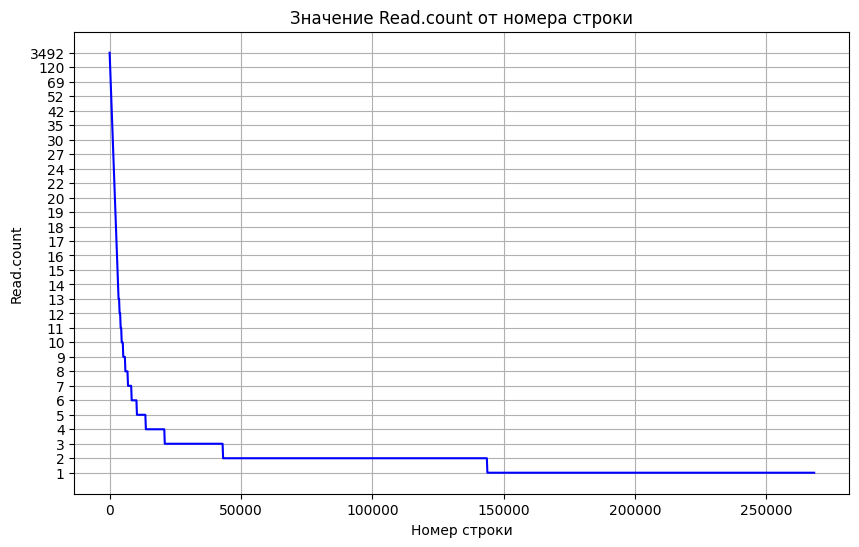

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df.index[::200], df['Read.count'][::200], linestyle='-', color='b')
plt.xlabel('Номер строки')
plt.ylabel('Read.count')
plt.title('Значение Read.count от номера строки')
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()

In [ ]:
index_30 = df[df['Read.count'] == '30'].index
print(index_30)

Index([1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209,
       1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221,
       1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233,
       1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245,
       1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255],
      dtype='int64')


In [ ]:
database = pd.read_excel("/content/vdjdb_slim.xlsx")

In [ ]:
database_exp = database.rename(columns={'cdr3': 'CDR3.amino.acid.sequence'})

In [ ]:
data_claster = df[:1198]
data_claster

,CDR3.amino.acid.sequence,Read.proportion,Read.count,bestVGene,bestJGene
0,CASSPQFTGSYEQYF,0.003109,3492,TRBV4-3,TRBJ2-7
1,CASSSPIAGQSSYEQYF,0.003081,3461,TRBV28,TRBJ2-7
2,CASSYGQNYNEQFF,0.002363,2654,TRBV5-1,TRBJ2-1
3,CSASLASGTGELFF,0.002002,2249,TRBV20-1,TRBJ2-2
4,CASSYGQGNQPQHF,0.001780,1999,TRBV6-5,TRBJ1-5
...,...,...,...,...,...
1193,CASSFKLANEQFF,0.000028,31,TRBV27,TRBJ2-1
1194,CASMLNGDFPAIQYF,0.000028,31,TRBV7-2,TRBJ2-5
1195,CASGAGAYEQYF,0.000028,31,TRBV6-2,TRBJ2-7
1196,CASSPGAYEQYF,0.000028,31,TRBV19,TRBJ2-7


# Функция кластеризации

In [ ]:
# Кэшированная функция для вычисления расстояния Левенштейна
@lru_cache(maxsize=None)
def cached_levenshtein_distance(seq1, seq2):
    return levenshtein_distance(seq1, seq2)

# Функция для кластеризации последовательностей
def cluster_sequences(sequences, max_distance=1):
    clusters = []
    for seq in sequences:
        added_to_cluster = False
        for cluster in clusters:
            if any(cached_levenshtein_distance(seq, existing_seq) <= max_distance for existing_seq in cluster):
                cluster.append(seq)
                added_to_cluster = True
                break
        if not added_to_cluster:
            clusters.append([seq])
    return clusters

# Функция для объединения кластеров
def merge_clusters(clusters, max_distance=1):
    merged_clusters = []
    for cluster in clusters:
        added_to_cluster = False
        for merged_cluster in merged_clusters:
            if any(cached_levenshtein_distance(seq, existing_seq) <= max_distance for seq in cluster for existing_seq in merged_cluster):
                merged_cluster.extend(cluster)
                added_to_cluster = True
                break
        if not added_to_cluster:
            merged_clusters.append(cluster)
    return merged_clusters

# Пример последовательностей аминокислот
sequences = data_claster['CDR3.amino.acid.sequence']

# Разделение данных на части
chunk_size = len(sequences) // 100
chunks = [sequences[i:i + chunk_size] for i in range(0, len(sequences), chunk_size)]

# Кластеризация каждой части
all_clusters = []
for chunk in chunks:
    all_clusters.extend(cluster_sequences(chunk, max_distance=1))

# Объединение кластеров
final_clusters = merge_clusters(all_clusters, max_distance=1)

# Вывод результатов
# Создание DataFrame
cluster_data = []
for i, cluster in enumerate(final_clusters):
    for seq in cluster:
        cluster_data.append({'Cluster': i + 1, 'Sequence': seq})

results_df = pd.DataFrame(cluster_data)

In [ ]:
# Создание нового DataFrame с данными из data_claster и номером кластера
cluster_assignments = {}
for i, cluster in enumerate(final_clusters):
  for seq in cluster:
    cluster_assignments[seq] = i + 1

results_df = data_claster.copy()
results_df['Cluster'] = results_df['CDR3.amino.acid.sequence'].map(cluster_assignments)

# Вывод нового DataFrame results_df
results_df


,CDR3.amino.acid.sequence,Read.proportion,Read.count,bestVGene,bestJGene,Cluster
0,CASSPQFTGSYEQYF,0.003109,3492,TRBV4-3,TRBJ2-7,1
1,CASSSPIAGQSSYEQYF,0.003081,3461,TRBV28,TRBJ2-7,2
2,CASSYGQNYNEQFF,0.002363,2654,TRBV5-1,TRBJ2-1,3
3,CSASLASGTGELFF,0.002002,2249,TRBV20-1,TRBJ2-2,4
4,CASSYGQGNQPQHF,0.001780,1999,TRBV6-5,TRBJ1-5,5
...,...,...,...,...,...,...
1193,CASSFKLANEQFF,0.000028,31,TRBV27,TRBJ2-1,1132
1194,CASMLNGDFPAIQYF,0.000028,31,TRBV7-2,TRBJ2-5,1133
1195,CASGAGAYEQYF,0.000028,31,TRBV6-2,TRBJ2-7,1134
1196,CASSPGAYEQYF,0.000028,31,TRBV19,TRBJ2-7,309


# Подсчёт Total Read Proportion

In [ ]:
# Подсчет суммарного Read.proportion для каждого кластера
cluster_proportions = {}
cluster_counts = {}
for index, row in data_claster.iterrows():
  seq = row['CDR3.amino.acid.sequence']
  proportion = row['Read.proportion']
  for i, cluster in enumerate(final_clusters):
    if seq in cluster:
      cluster_proportions[i + 1] = cluster_proportions.get(i + 1, 0) + proportion
      cluster_counts[i + 1] = cluster_counts.get(i + 1, 0) + 1
      break

# Создание DataFrame с суммарными пропорциями, номерами кластеров и количеством последовательностей
proportions_data = []
for cluster_number, total_proportion in cluster_proportions.items():
  proportions_data.append({'Cluster': cluster_number,
               'Total Read Proportion': total_proportion,
               'Sequence Count': cluster_counts[cluster_number]})



# Сортировка по Sequence Count

In [ ]:
proportions_df = pd.DataFrame(proportions_data)
proportions_df = proportions_df.sort_values(by='Sequence Count', ascending=False)
proportions_df

,Cluster,Total Read Proportion,Sequence Count
538,539,0.000324,9
56,57,0.000584,6
108,109,0.000390,5
69,70,0.000430,5
218,219,0.000282,4
...,...,...,...
393,394,0.000061,1
394,395,0.000061,1
395,396,0.000061,1
396,397,0.000061,1


# Сортировка по Total Read Proportion

In [ ]:
proportions_df_sorted = proportions_df.sort_values(by='Total Read Proportion', ascending=False)
proportions_df_sorted = proportions_df_sorted.loc[proportions_df_sorted['Sequence Count'] > 1]
proportions_df_sorted

,Cluster,Total Read Proportion,Sequence Count
0,1,0.003191,2
4,5,0.002414,2
9,10,0.001172,4
56,57,0.000584,6
26,27,0.000534,2
37,38,0.000433,2
69,70,0.000430,5
39,40,0.000395,3
108,109,0.000390,5
42,43,0.000351,2


# Выбор кластера

In [ ]:
full = pd.merge(results_df, database_exp , on='CDR3.amino.acid.sequence', how='inner')

In [ ]:
full = full[['Cluster', 'CDR3.amino.acid.sequence', 'Read.proportion', 'bestVGene',	'bestJGene', 'v.segm',	'j.segm', 'mhc.class', 'species', 'antigen.species', 'antigen.gene']]
full

,Cluster,CDR3.amino.acid.sequence,Read.proportion,bestVGene,bestJGene,v.segm,j.segm,mhc.class,species,antigen.species,antigen.gene
0,27,CSAPTSGGPNEQFF,0.000467,TRBV20-1,TRBJ2-1,TRBV20-1*01,TRBJ2-1*01,MHCI,HomoSapiens,YFV,NS4B
1,46,CASSLEGQASSYEQYF,0.000290,TRBV5-1,TRBJ2-7,TRBV5-1*01,TRBJ2-7*01,MHCI,HomoSapiens,EBV,LMP2A
2,46,CASSLEGQASSYEQYF,0.000290,TRBV5-1,TRBJ2-7,TRBV5-1*01,TRBJ2-7*01,MHCI,HomoSapiens,EBV,BMLF1
3,56,CASSSGTSGSYEQYF,0.000258,TRBV5-1,TRBJ2-7,TRBV27*01,TRBJ2-7*01,MHCI,HomoSapiens,CMV,IE1
4,99,CASSGQGAYEQYF,0.000169,TRBV6-3,TRBJ2-7,TRBV6-1*01,TRBJ2-7*01,MHCI,HomoSapiens,YFV,NS4B
...,...,...,...,...,...,...,...,...,...,...,...
60,1051,CASSLGGNEQYF,0.000029,TRBV28,TRBJ2-7,TRBV7-8*01,TRBJ2-7*01,MHCI,HomoSapiens,HomoSapiens,TKT
61,1054,CASRLAGGNYNEQFF,0.000029,TRBV7-9,TRBJ2-1,TRBV2*01,TRBJ2-1*01,MHCI,HomoSapiens,CMV,pp65
62,1097,CASSFQGNYEQYF,0.000028,TRBV12-4,TRBJ2-7,TRBV11-2*01,TRBJ2-7*01,MHCI,HomoSapiens,HIV-1,Gag
63,1097,CASSFQGNYEQYF,0.000028,TRBV12-4,TRBJ2-7,TRBV5-8*01,TRBJ2-7*01,MHCI,HomoSapiens,CMV,IE1


In [ ]:
full_vj = full.loc[(full['bestVGene'].str[:7] == full['v.segm'].str[:7]) & (full['bestJGene'].str[:7] == full['j.segm'].str[:7])]
full_vj

,Cluster,CDR3.amino.acid.sequence,Read.proportion,bestVGene,bestJGene,v.segm,j.segm,mhc.class,species,antigen.species,antigen.gene
0,27,CSAPTSGGPNEQFF,0.000467,TRBV20-1,TRBJ2-1,TRBV20-1*01,TRBJ2-1*01,MHCI,HomoSapiens,YFV,NS4B
1,46,CASSLEGQASSYEQYF,0.000290,TRBV5-1,TRBJ2-7,TRBV5-1*01,TRBJ2-7*01,MHCI,HomoSapiens,EBV,LMP2A
2,46,CASSLEGQASSYEQYF,0.000290,TRBV5-1,TRBJ2-7,TRBV5-1*01,TRBJ2-7*01,MHCI,HomoSapiens,EBV,BMLF1
7,173,CASSQGAGELFF,0.000121,TRBV12-4,TRBJ2-2,"TRBV12-4*01,TRBV4-2*01",TRBJ2-2*01,MHCI,HomoSapiens,InfluenzaA,M
8,173,CASSQGAGELFF,0.000121,TRBV12-4,TRBJ2-2,TRBV12-4*01,TRBJ2-2*01,MHCI,HomoSapiens,CMV,IE1
48,930,CASSDSSGGNEQFF,0.000032,TRBV6-4,TRBJ2-1,TRBV6-4*01,TRBJ2-1*01,MHCI,HomoSapiens,CMV,IE1
51,1017,CSARSGVGNTIYF,0.000029,TRBV20-1,TRBJ1-3,TRBV20-1*01,TRBJ1-3*01,MHCI,HomoSapiens,EBV,BMLF1


In [ ]:
full_vj['Cluster'].value_counts()

,count
Cluster,
46,2
173,2
27,1
930,1
1017,1


# Обработка для одного выбранного кластера

*беру 27 кластер, потому что у него наибольшая Read.proportion*

In [ ]:
results_df_one_cluster = results_df.loc[results_df['Cluster'] == 27]
results_df_one_cluster = results_df_one_cluster.rename(columns={'Sequence': 'CDR3.amino.acid.sequence'})
results_df_one_cluster

,CDR3.amino.acid.sequence,Read.proportion,Read.count,bestVGene,bestJGene,Cluster
27,CSAPTSGGPNEQFF,0.000467,524,TRBV20-1,TRBJ2-1,27
352,CSAPTSGGGNEQFF,0.000068,76,TRBV20-1,TRBJ2-1,27


In [ ]:
full = pd.merge(results_df_one_cluster, database_exp , on='CDR3.amino.acid.sequence', how='inner')

In [ ]:
full = full[['Cluster', 'CDR3.amino.acid.sequence', 'Read.proportion', 'bestVGene',	'bestJGene', 'v.segm',	'j.segm', 'mhc.class', 'species', 'antigen.species', 'antigen.gene']]
full

,Cluster,CDR3.amino.acid.sequence,Read.proportion,bestVGene,bestJGene,v.segm,j.segm,mhc.class,species,antigen.species,antigen.gene
0,27,CSAPTSGGPNEQFF,0.000467,TRBV20-1,TRBJ2-1,TRBV20-1*01,TRBJ2-1*01,MHCI,HomoSapiens,YFV,NS4B


In [ ]:
full['antigen.gene'].value_counts()

,count
antigen.gene,
NS4B,1
